In [16]:
#We will be using anomoly detection for this

https://www.coursera.org/learn/unsupervised-learning-recommenders-reinforcement-learning/programming/Rqh9M/anomaly-detection/lab?path=%2Fnotebooks%2FC3_W1_Anomaly_Detection.ipynb

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
df=pd.read_csv('train.csv')

In [22]:
df.head(5)

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [23]:
df.shape

(136429, 14)

##  <center> creating TEST and CV datasets </center>

In [25]:
df['Machine failure'].value_counts()

0    134281
1      2148
Name: Machine failure, dtype: int64

In [26]:
new_df = df[df['Machine failure'] ==0 ]                  

In [28]:
new_df['Machine failure'].value_counts()

0    134281
Name: Machine failure, dtype: int64

In [29]:
# new_df.to_csv('only_train.csv', index=False)

In [30]:
new_dfcv = df[df['Machine failure'] ==1 ]   

In [31]:
new_dfcv['Machine failure'].value_counts()

1    2148
Name: Machine failure, dtype: int64

In [32]:
# new_dfcv.to_csv('only_cv.csv', index=False)

In [33]:
df=pd.read_csv('only_train.csv')

In [34]:
df.head(5)

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [36]:
df['Type'].value_counts()

L    1595
M     437
H     116
Name: Type, dtype: int64

# <center> PLOTTING DATA "only_cv.csv" <center>

All values in train data have non working engine

In [3]:
df=pd.read_csv('only_cv.csv')

In [10]:
df['Machine failure'].value_counts()

1    2148
Name: Machine failure, dtype: int64

### AIR Temperature

Text(0.5, 0, 'Data')

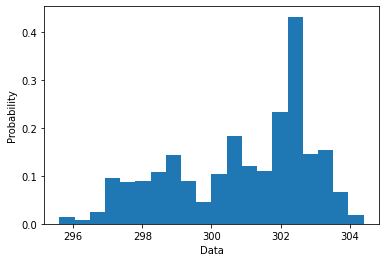

In [34]:
plt.hist(df['Air temperature [K]'],density=True, bins=20)
plt.ylabel('Probability')
plt.xlabel('Data')

In [12]:
max(df['Air temperature [K]'])   #max temperature

304.4

In [13]:
min(df['Air temperature [K]']) #min temperature

295.6

### Process temperature [K]

Text(0.5, 0, 'Data')

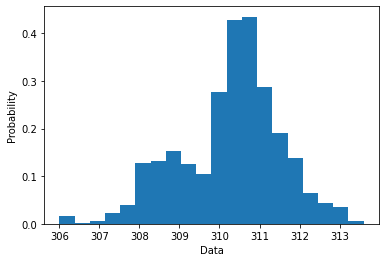

In [35]:
plt.hist(df['Process temperature [K]'],density=True, bins=20)
plt.ylabel('Probability')
plt.xlabel('Data')

In [15]:
max(df['Process temperature [K]'])

313.6

In [16]:
min(df['Process temperature [K]']) 

306.0

### Rotational speed [rpm]

Text(0.5, 0, 'Data')

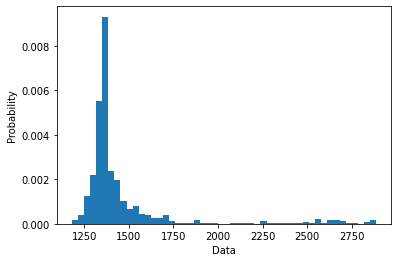

In [17]:
plt.hist(df['Rotational speed [rpm]'],density=True, bins=50)
plt.ylabel('Probability')
plt.xlabel('Data')

In [18]:
max(df['Rotational speed [rpm]'])

2886

In [19]:
min(df['Rotational speed [rpm]'])

1181

### Torque [Nm]

Text(0.5, 0, 'Data')

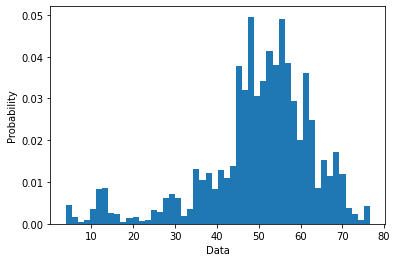

In [20]:
plt.hist(df['Torque [Nm]'],density=True, bins=50)
plt.ylabel('Probability')
plt.xlabel('Data')

In [21]:
max(df['Torque [Nm]'])

76.6

In [22]:
min(df['Torque [Nm]'])

3.8

### Tool wear [min]

Text(0.5, 0, 'Data')

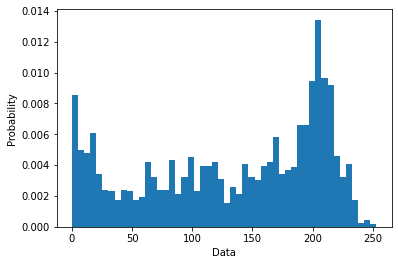

In [23]:
plt.hist(df['Tool wear [min]'],density=True, bins=50)
plt.ylabel('Probability')
plt.xlabel('Data')

In [26]:
min(df['Tool wear [min]'])

0

In [27]:
max(df['Tool wear [min]'])

253

### Other Data

In [28]:
df['TWF'].value_counts()

0    1936
1     212
Name: TWF, dtype: int64

In [29]:
df['HDF'].value_counts()

0    1450
1     698
Name: HDF, dtype: int64

In [30]:
df['PWF'].value_counts()

0    1824
1     324
Name: PWF, dtype: int64

In [31]:
df['OSF'].value_counts()

0    1612
1     536
Name: OSF, dtype: int64

In [32]:
df['RNF'].value_counts()

0    2142
1       6
Name: RNF, dtype: int64